<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="lightblue" size=6px>
                    <b> Project :  Customer Capability of Purchasing
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')



In [3]:
df=pd.read_csv('data/data_new.csv')
df.head()

,Client_Id,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45.000000,M,3,High School,Married,$60K - $80K,Blue,39.000000,5,1.000000,3.000000,12691.000000,777,11914.000000,1144.000000,42.000000,0.061000
1,818770008,Existing Customer,49.000000,F,5,Graduate,Single,Less than $40K,Blue,44.000000,6,1.000000,2.000000,8256.000000,864,7392.000000,1291.000000,33.000000,0.105000
2,713982108,Existing Customer,51.000000,M,3,Graduate,Married,$80K - $120K,Blue,36.000000,4,1.000000,2.455317,3418.000000,0,3418.000000,1887.000000,20.000000,0.000000
3,769911858,Existing Customer,40.000000,F,4,High School,Married,Less than $40K,Blue,34.000000,3,4.000000,1.000000,3313.000000,2517,796.000000,1171.000000,20.000000,0.760000
4,709106358,Existing Customer,40.000000,M,3,Uneducated,Married,$60K - $80K,Blue,21.000000,5,1.000000,2.455317,4716.000000,0,4716.000000,816.000000,28.000000,0.000000


In [4]:
## not required custemer id column
df.drop(labels='Client_Id',axis=1,inplace=True)

In [5]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,Existing Customer,45.000000,M,3,High School,Married,$60K - $80K,Blue,39.000000,5,1.000000,3.000000,12691.000000,777,11914.000000,1144.000000,42.000000,0.061000
1,Existing Customer,49.000000,F,5,Graduate,Single,Less than $40K,Blue,44.000000,6,1.000000,2.000000,8256.000000,864,7392.000000,1291.000000,33.000000,0.105000
2,Existing Customer,51.000000,M,3,Graduate,Married,$80K - $120K,Blue,36.000000,4,1.000000,2.455317,3418.000000,0,3418.000000,1887.000000,20.000000,0.000000
3,Existing Customer,40.000000,F,4,High School,Married,Less than $40K,Blue,34.000000,3,4.000000,1.000000,3313.000000,2517,796.000000,1171.000000,20.000000,0.760000
4,Existing Customer,40.000000,M,3,Uneducated,Married,$60K - $80K,Blue,21.000000,5,1.000000,2.455317,4716.000000,0,4716.000000,816.000000,28.000000,0.000000


## Automation of FE

In [1]:
## segregation of numerical and categorical columns

categorical_cols=df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(exclude='object').columns

NameError: name 'df' is not defined

In [6]:
print("categorical columns : ",categorical_cols)
print("Numerical columns : ",numerical_cols)

categorical columns :  Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')
Numerical columns :  Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_Count', 'Contacts_Count',
       'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio'],
      dtype='object')


In [44]:
cat = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']
num = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_Count', 'Contacts_Count',
       'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

In [7]:
## Define custom ranking for each ordinal variable 

Attrition_Flag_categories=['Attrited Customer','Existing Customer']
Gender_categories=['F','M']
Education_Level_categories=['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate']
Marital_Status_categories=['Divorced','Single','Married']
Income_Category_categories=['Unknown','Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +']
Card_Category_categories=['Blue', 'Silver','Gold','Platinum']


In [8]:
## Pipeline creation 

In [9]:
## Numeric pipeline

num_pipeline=Pipeline(
steps=[
    ('scaler',StandardScaler())
])

## categorical pipeline

cat_pipeline = Pipeline(
steps=[
    ('ordinalencoder',OrdinalEncoder(categories=[Attrition_Flag_categories,Gender_categories,Education_Level_categories,Marital_Status_categories,Income_Category_categories,Card_Category_categories])),
    ('scaler',StandardScaler())
])

## preprocessor

preprocessor=ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
    
])

In [10]:
data=pd.DataFrame(preprocessor.fit_transform(df),columns=list(df.columns))

In [11]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.620039,-0.250587
1,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.736292,-0.250587
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.298204,-0.250587
3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,1.759686,0.437506,-0.943436,-0.893680,0.853099,-0.736292,-0.250587
4,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,-0.997155,0.437506,1.059956,-1.637214,0.853099,0.620039,-0.250587


In [12]:
## PCA Dimentionality Reduction 

In [13]:
pca= PCA(n_components=3)
pca.fit(data)
pca_df=pd.DataFrame(pca.transform(data),columns=['col1','col2','col3'])
pca_df.head()

,col1,col2,col3
0,2.241442,-1.520767,0.998553
1,0.049154,-1.332573,-0.039661
2,0.950387,-1.985029,0.333333
3,-2.314096,-1.079938,1.090360
4,0.948940,-1.866139,-0.069300


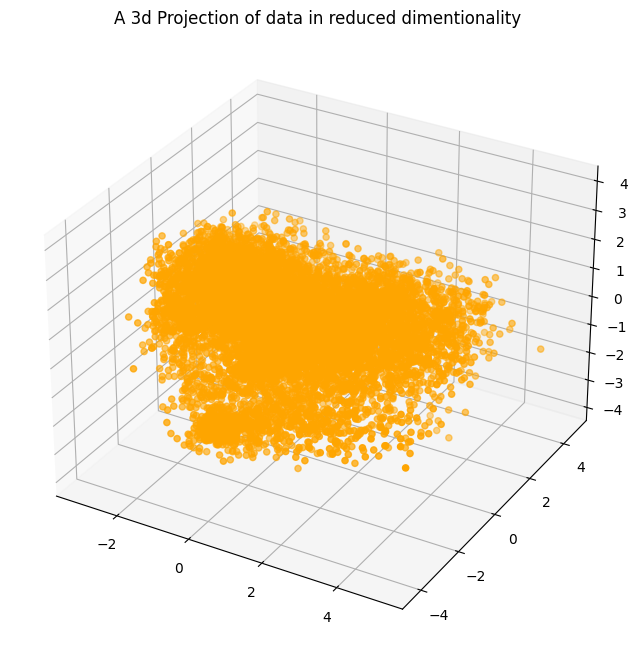

In [14]:
## #d projection of data

x=pca_df['col1']
y=pca_df['col2']
z=pca_df['col3']

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c='orange',marker='o')
ax.set_title('A 3d Projection of data in reduced dimentionality')
plt.show()


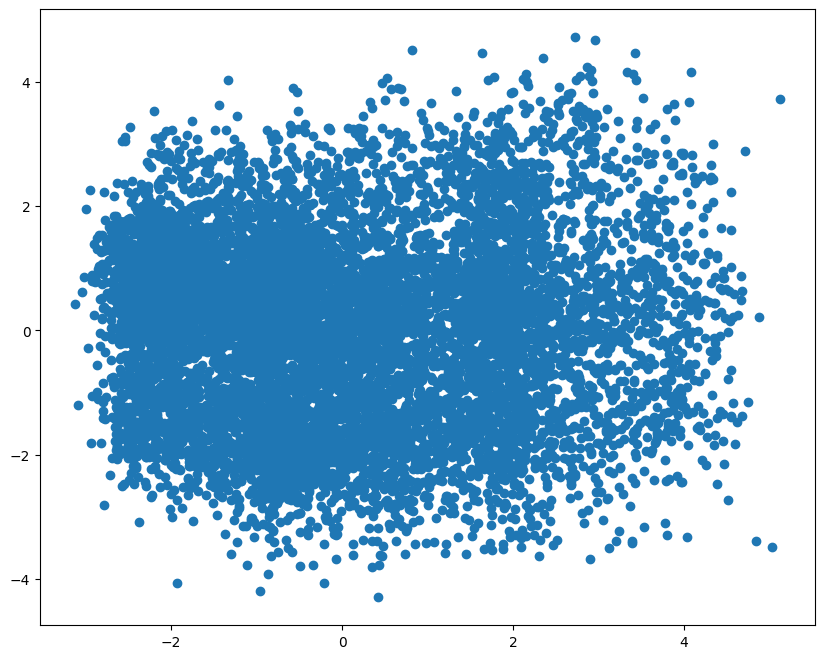

In [15]:
## 2d scatter plot of data

plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.show()

In [16]:
## Elbow method to select k value

wcss =[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[70302.52432856281,
 47536.273322158406,
 36886.46334205152,
 29555.31473486866,
 24496.467727626885,
 20937.218923882483,
 19065.71962467936,
 17524.589896987578,
 16142.005574778472,
 15102.279565860534]

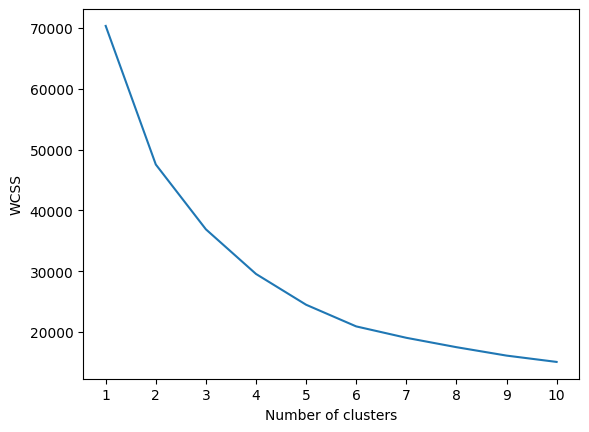

In [18]:
## plot elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
k1=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
k1.knee

4

In [20]:
## silhouette score

silhouette_coefficient = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(pca_df)
    score=silhouette_score(pca_df,kmeans.labels_)
    silhouette_coefficient.append(score)

In [21]:
silhouette_coefficient

[0.3177480034938618,
 0.2967663572226661,
 0.3046823171388813,
 0.2941897641782168,
 0.30210765571835985,
 0.2939792746315235,
 0.2945112994024374,
 0.30202150437858355,
 0.29570845457774336]

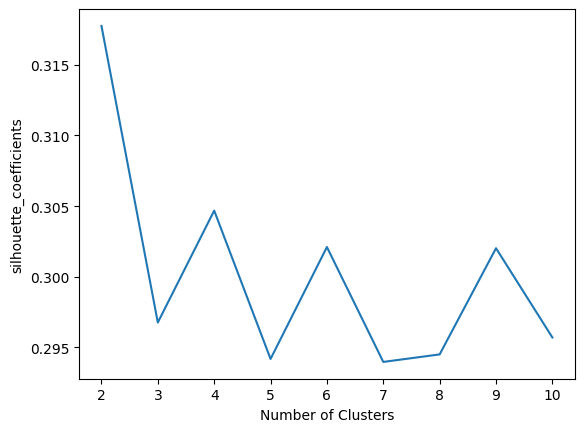

In [22]:
## plotting silhoutte score

plt.plot(range(2,11),silhouette_coefficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette_coefficients")
plt.show()

In [23]:
## we will go with 4 clusters 

In [24]:
kmeans=KMeans(n_clusters=4,init='k-means++')

In [25]:
## fit model and predict clusters

In [26]:
clusters=kmeans.fit_predict(pca_df)

In [27]:
pca_df['Clusters']=clusters

In [28]:
data['Clusters']=clusters
df['Clusters']=clusters

In [29]:
pca_df.head()

,col1,col2,col3,Clusters
0,2.241442,-1.520767,0.998553,1
1,0.049154,-1.332573,-0.039661,0
2,0.950387,-1.985029,0.333333,3
3,-2.314096,-1.079938,1.090360,0
4,0.948940,-1.866139,-0.069300,3


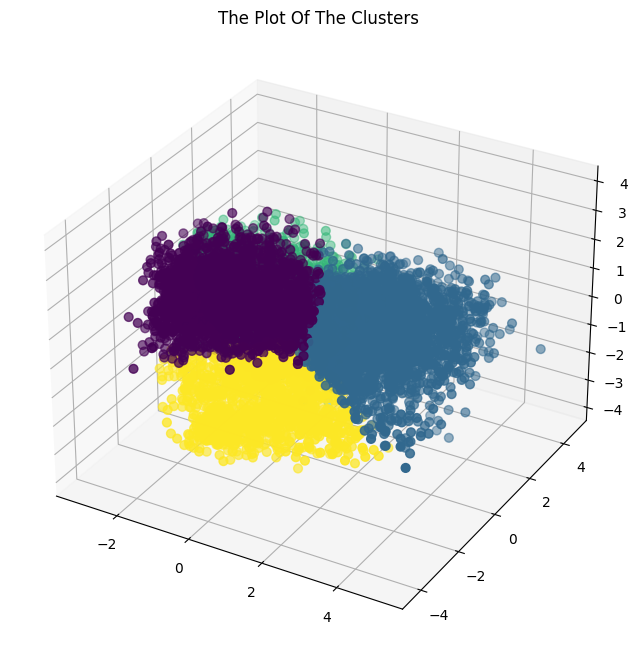

In [30]:
## Lets examine cluster formed with 3d visualization

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=pca_df["Clusters"], marker='o' )
ax.set_title("The Plot Of The Clusters")
plt.show()

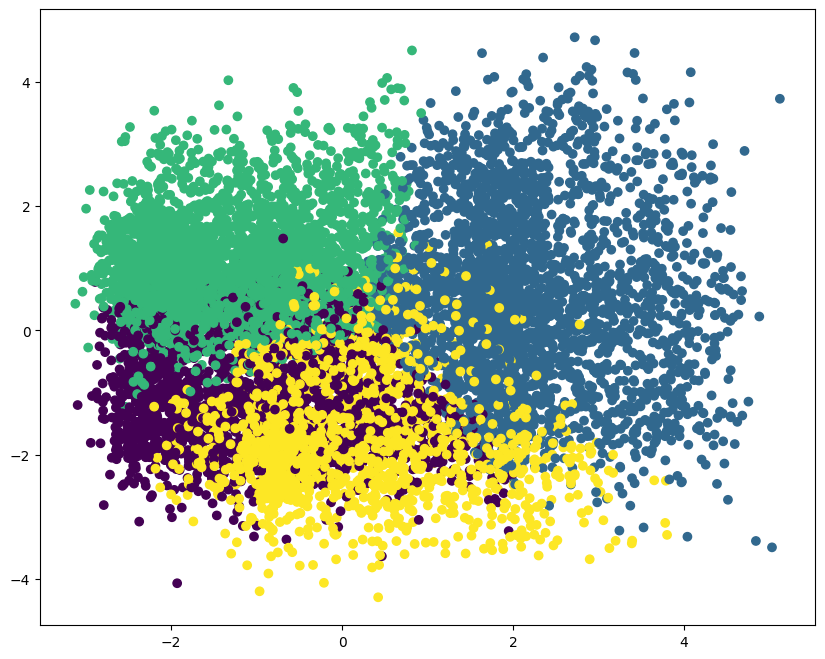

In [31]:
## 2d visualization 

plt.figure(figsize=(10,8))
plt.scatter(x,y,c=pca_df['Clusters'])
plt.show()


Text(0.5, 1.0, 'Distribution of the clusters')

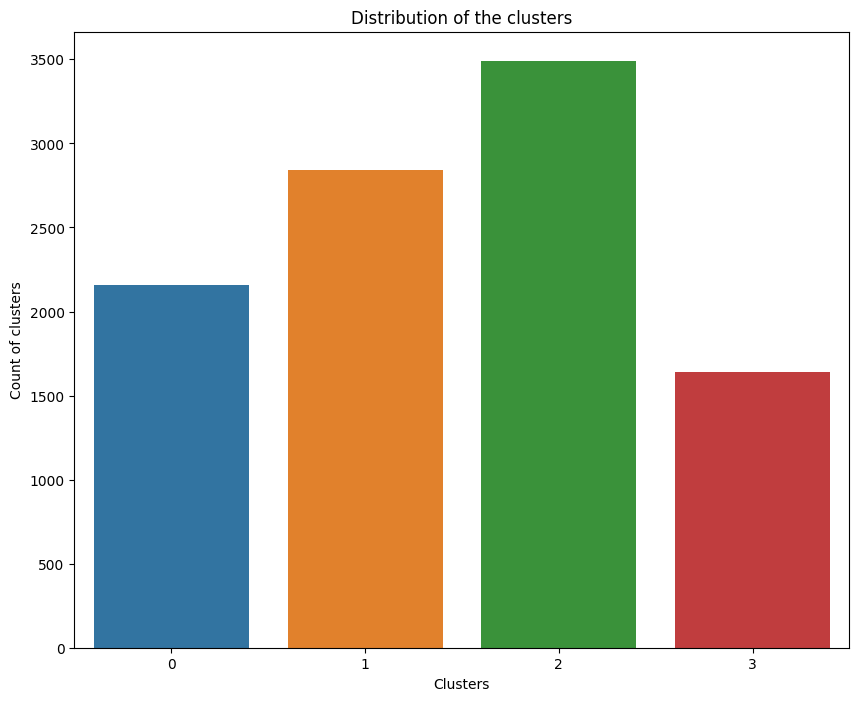

In [32]:
## Let's Evaluate cluster

plt.figure(figsize=(10,8))
sns.countplot(x=data['Clusters'])
plt.xlabel('Clusters')
plt.ylabel('Count of clusters')
plt.title('Distribution of the clusters')

### Clusters seems to be fairly distributes 

In [33]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters
0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.620039,-0.250587,1
1,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.736292,-0.250587,0
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.298204,-0.250587,3
3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,1.759686,0.437506,-0.943436,-0.893680,0.853099,-0.736292,-0.250587,0
4,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,-0.997155,0.437506,1.059956,-1.637214,0.853099,0.620039,-0.250587,3


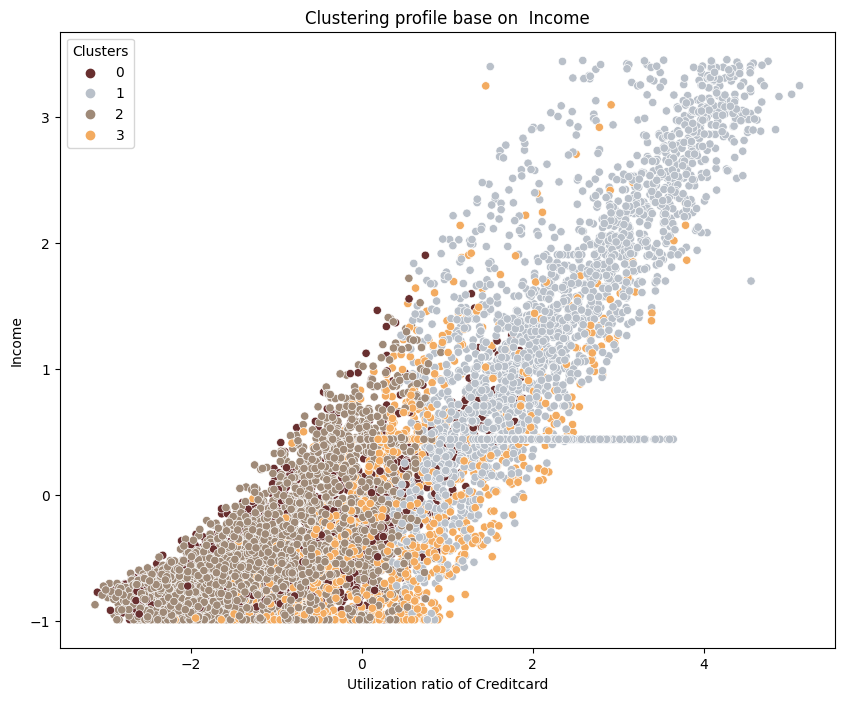

In [34]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_df['col1'],y=data['Income_Category'],hue=data['Clusters'],palette=pal)
plt.xlabel('Utilization ratio of Creditcard')
plt.ylabel('Income')
plt.title('Clustering profile base on  Income')
plt.show()

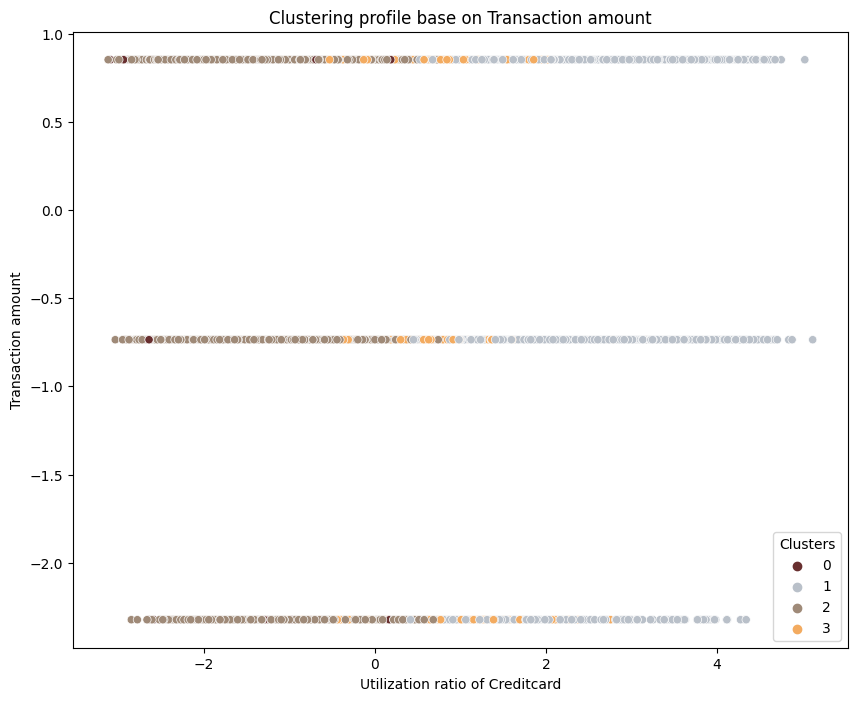

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_df['col1'],y=data['Total_Trans_Amt'],hue=data['Clusters'],palette=pal)
plt.xlabel('Utilization ratio of Creditcard')
plt.ylabel('Transaction amount')
plt.title('Clustering profile base on Transaction amount')
plt.show()

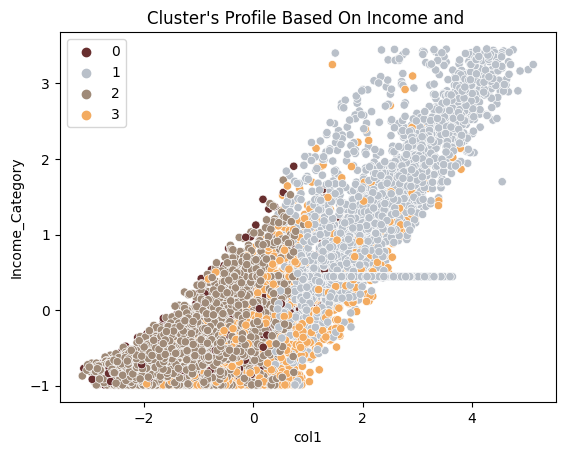

In [36]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(x=pca_df['col1'], y=data['Income_Category'],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income and ")
plt.legend()
plt.show()

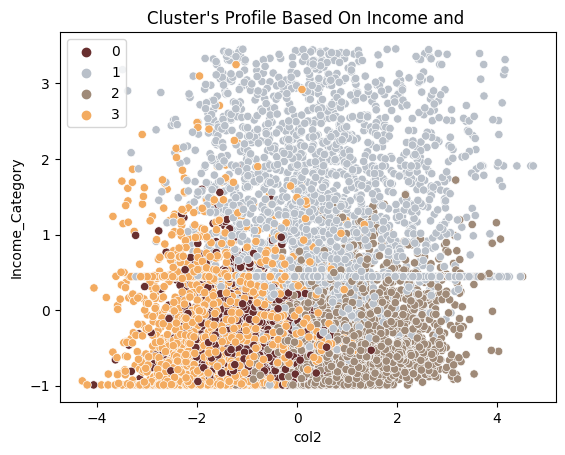

In [37]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(x=pca_df['col2'], y=data['Income_Category'],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income and ")
plt.legend()
plt.show()

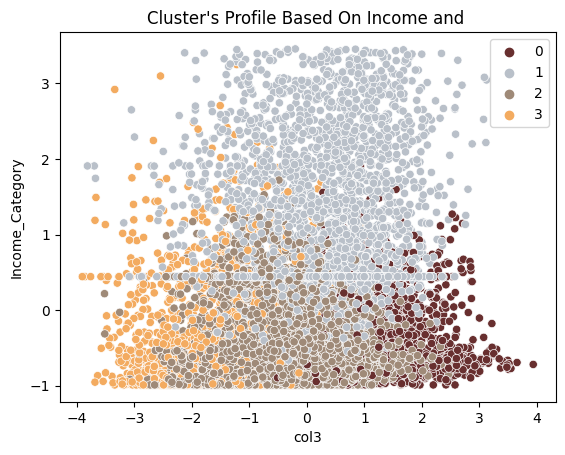

In [38]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.scatterplot(x=pca_df['col3'], y=data['Income_Category'],hue=data["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income and ")
plt.legend()
plt.show()

# Profiling

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are four in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

In [39]:
features = ['Customer_Age','Education_Level','Income_Category','Card_Category','Credit_Limit','Total_Trans_Amt']

<Figure size 640x480 with 0 Axes>

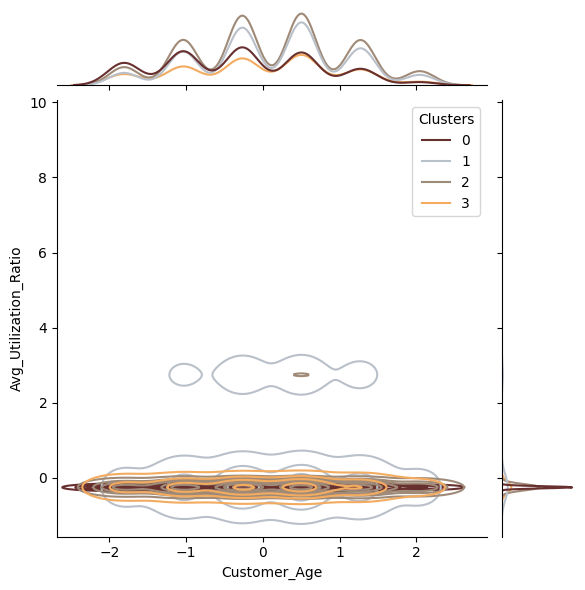

<Figure size 640x480 with 0 Axes>

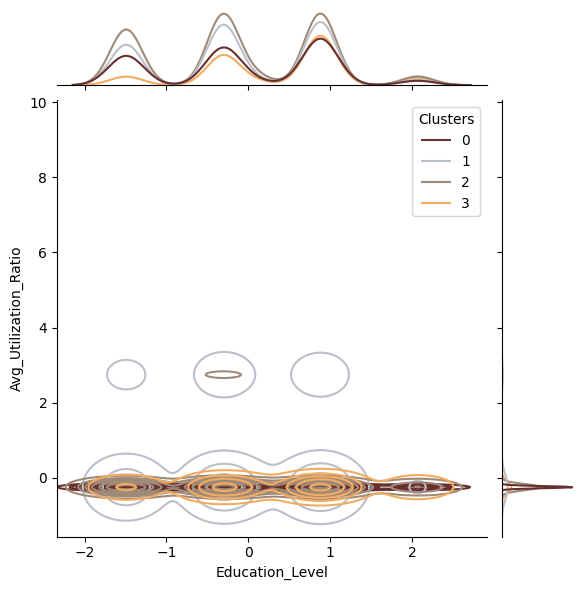

<Figure size 640x480 with 0 Axes>

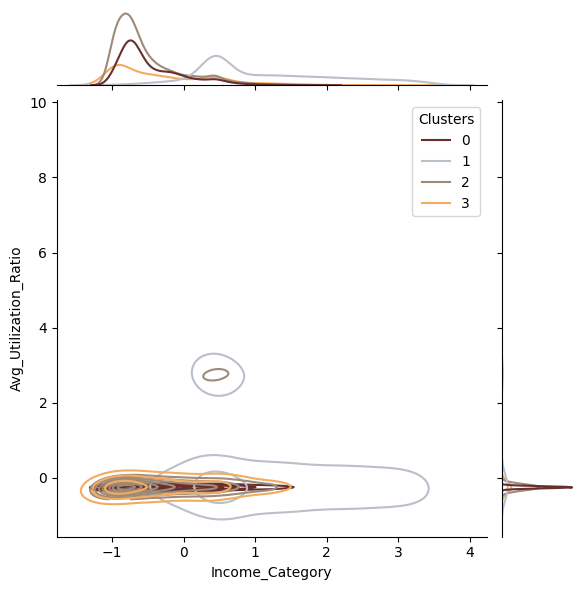

<Figure size 640x480 with 0 Axes>

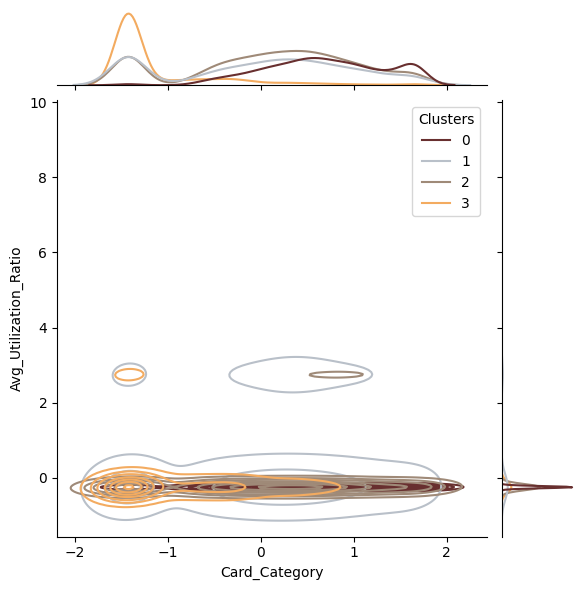

<Figure size 640x480 with 0 Axes>

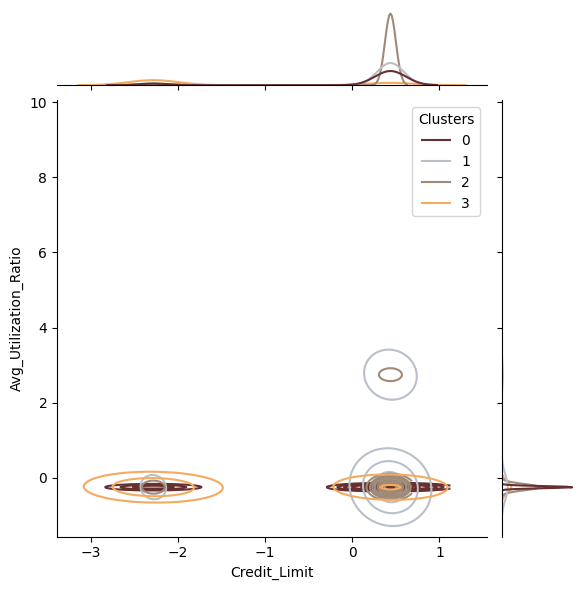

<Figure size 640x480 with 0 Axes>

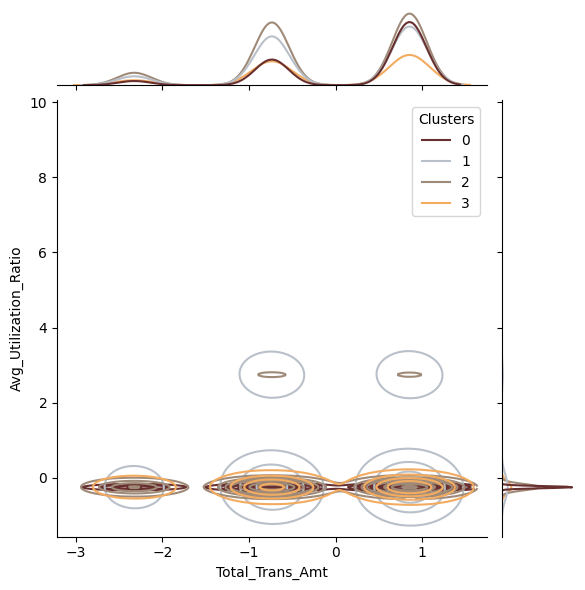

In [40]:
for i in features:
    plt.figure()
    sns.jointplot(x=data[i],y=data['Avg_Utilization_Ratio'],hue=data['Clusters'],kind='kde',palette=pal)
    plt.show()

In [41]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters
0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.620039,-0.250587,1
1,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.736292,-0.250587,0
2,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.298204,-0.250587,3
3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,1.759686,0.437506,-0.943436,-0.893680,0.853099,-0.736292,-0.250587,0
4,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,-0.997155,0.437506,1.059956,-1.637214,0.853099,0.620039,-0.250587,3


# Profiling the clusters

1. About cluster no : 0
-  All age group available
-  have very good education level
-  good income category
-  card usage all type
-  credit limit maximum utilized
-  maximum transaction amount utilized

2. About cluster no : 1
-  All age group available
-  have very good education level
-  fair income category
-  card usege all type 
-  credit limit utilize max
-  max transaction amout utilized

3. About cluster no : 2
-  All age group avalable
-  medium education level
-  less income category
-  card usage Blue max low impact
-  credit limit usage medium
-  max transaction amount utilized

4. About cluster no : 3
-  All age group available
-  have very good education level
-  fair income category
-  good category card usage
-  max credit limit utilized
-  max transaction amt utilized


# Testing 

In [42]:

## dependent and independent variable 

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

## train test split 

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size= 0.33,random_state=42)

In [43]:
classifier = DecisionTreeClassifier()
classifier1 = SVC()
classifier2 = RandomForestClassifier()

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
classifier.fit(X_train,y_train)
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)

In [ ]:
## Accuracy score of desicion tree classifier

print("Below is accuracy score of decision tree classifier ")

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Below is accuracy score of decision tree classifier 
0.8671454219030521
[[ 791   19   35   27]
 [  18 1038   34   82]
 [  32   31  447   27]
 [  51   59   29  622]]


In [ ]:
## Accuracy score of SVC

print("Below is accuracy score of support vector classifier ")

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

Below is accuracy score of support vector classifier 
0.9605026929982047
[[ 853    4    8    7]
 [  10 1142    5   15]
 [  13   24  491    9]
 [  14   18    5  724]]


In [ ]:
## Accuracy score of desicion tree classifier

print("Below is accuracy score of Random forest classifier ")

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Below is accuracy score of Random forest classifier 
0.9254937163375224
[[ 835   11   12   14]
 [   8 1117    8   39]
 [  22   26  471   18]
 [  35   44   12  670]]


### Observation :

- Decision Tree Accuracy :  0.86
- SVC accuracy :  0.96
- Random forest accuracy : 0.92

By above tests accuracy we can say that our model gives very good accuracy so we can use it for further procedure 

In [ ]:
## save clustered data into csv file and

df1 = pd.concat([df,data.iloc[:-1]],axis = 1)

In [ ]:
df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_Count,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,Clusters
0,Existing Customer,45.000000,M,3,High School,Married,$60K - $80K,Blue,39.000000,5,1.000000,3.000000,12691.000000,777,11914.000000,1144.000000,42.000000,0.061000,0,-0.164947,0.503368,0.475584,0.763943,-1.490798,0.569467,1.251665,-0.473422,1.302327,-1.501375,-0.974223,-0.775882,0.437506,1.059956,-0.893680,0.853099,0.620039,-0.250587,0.000000
1,Existing Customer,49.000000,F,5,Graduate,Single,Less than $40K,Blue,44.000000,6,1.000000,2.000000,8256.000000,864,7392.000000,1291.000000,33.000000,0.105000,3,0.334518,2.043199,1.278655,1.407306,-1.490798,-0.544797,0.368575,-0.366667,0.415134,-1.410604,-1.358042,-0.616276,0.437506,-0.943436,0.593388,-0.735306,-0.736292,-0.250587,3.000000
2,Existing Customer,51.000000,M,3,Graduate,Married,$80K - $120K,Blue,36.000000,4,1.000000,2.455317,3418.000000,0,3418.000000,1887.000000,20.000000,0.000000,3,0.584250,0.503368,-0.006258,0.120579,-1.490798,-0.037453,-0.594761,-1.426858,-0.364544,-1.042579,-1.912446,-0.997155,0.437506,1.059956,0.593388,0.853099,1.298204,-0.250587,3.000000
3,Existing Customer,40.000000,F,4,High School,Married,Less than $40K,Blue,34.000000,3,4.000000,1.000000,3313.000000,2517,796.000000,1171.000000,20.000000,0.760000,3,-0.789277,1.273283,-0.327486,-0.522785,2.069070,-1.659061,-0.615668,1.661686,-0.878966,-1.484703,-1.912446,1.759686,0.437506,-0.943436,-0.893680,0.853099,-0.736292,-0.250587,3.000000
4,Existing Customer,40.000000,M,3,Uneducated,Married,$60K - $80K,Blue,21.000000,5,1.000000,2.455317,4716.000000,0,4716.000000,816.000000,28.000000,0.000000,2,-0.789277,0.503368,-2.415470,0.763943,-1.490798,-0.037453,-0.336305,-1.426858,-0.109883,-1.703913,-1.571274,-0.997155,0.437506,1.059956,-1.637214,0.853099,0.620039,-0.250587,2.000000


In [ ]:
df1.to_csv("data/Clustered_data.csv",index=False)

# Conclusion : 

#### After getting cluster profiling detail and testing the same we get conclusion as below : 

-  Excellent Customers : cluster no 0
-  Very Good Customers : cluster no 3
-  Good Customers : cluster no 1
-  Fair Customers : cluster no 2